# Simple plotting

In [1]:
import pysal as ps
import pandas as pd
import numpy as np

This notebook will cover simple plotting. So that we can visualize plots within the notebook, we first must "turn on" the notebook plotting capabilities. 

Commands in a Jupyter notebook that start with `%` or `%%` are known as [magics](http://ipython.readthedocs.io/en/stable/interactive/magics.html?highlight=magics), and are essentially directions to the Jupyter kernel itself. Usually the commands *do not* execute in Python and are, in fact, not actually part of Python. The command to enable inline plotting in a notebook is `%matplotlib inline`. Another magic, `%matplotlib notebook`, provides some additional tools which we will cover. 

The standard python plotting library `matplotlib`, has a special submodule, `pyplot`, that is used to provide an environment for plotting functions. So, we will import `matplotlib.pyplot` directly. This is commonly done in plotting code. 

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt


Before we do any plotting, let's read in some of the data that we have used before, the historical per-capita income data for US States:

In [3]:
path = ps.examples.get_path('usjoin.csv')
#remember, this is a csv, so you should use pandas.read_csv to get a dataframe
data = pd.read_csv(path, index_col='STATE_FIPS') 
W = ps.queen_from_shapefile(ps.examples.get_path('us48.shp'), idVariable='STATE_FIPS')

In [4]:
data.head()

,Name,1929,1930,1931,1932,1933,1934,1935,1936,1937,...,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009
STATE_FIPS,,,,,,,,,,,,,,,,,,,,,
1,Alabama,323,267,224,162,166,211,217,251,267,...,23471,24467,25161,26065,27665,29097,30634,31988,32819,32274
4,Arizona,600,520,429,321,308,362,416,462,504,...,25578,26232,26469,27106,28753,30671,32552,33470,33445,32077
5,Arkansas,310,228,215,157,157,187,207,247,256,...,22257,23532,23929,25074,26465,27512,29041,31070,31800,31493
6,California,991,887,749,580,546,603,660,771,795,...,32275,32750,32900,33801,35663,37463,40169,41943,42377,40902
8,Colorado,634,578,471,354,353,368,444,542,532,...,32949,34228,33963,34092,35543,37388,39662,41165,41719,40093


Pandas provides two simple and fast plotting attributes, `hist` and `plot`. 

`hist` will plot a histogram of data, and can be called either on the entire dataframe or on individual series/columns:

### Pandas histograms

Pandas has a `histogram` function for any column or table. These are configured to be easy to use, and typically can pass arbitrary options down to the underlying `matplotlib.hist` function:

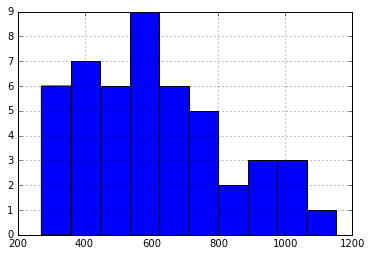

In [5]:
data['1929'].hist()

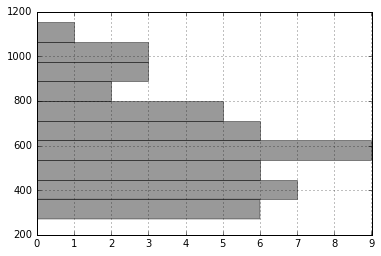

In [6]:
data['1929'].hist(color='black', alpha=.4, orientation='horizontal',
                  bins=10)

Again, this histogram function is not as detailed as the matplotlib histogram function which we'll show in a second, but one very useful option is the `by` for the pandas column/table histogram, since it allows you to quickly construct histograms by group. 

For instance, let's introduce a dummy variable denoting whether or not a state is in the US south:

In [7]:
south_dummy = [[u'Alabama', 1],
       [u'Arizona', 0],
       [u'Arkansas', 1],
       [u'California', 0],
       [u'Colorado', 0],
       [u'Connecticut', 0],
       [u'Delaware', 1],
       [u'District of Columbia', 1],
       [u'Florida', 1],
       [u'Georgia', 1],
       [u'Idaho', 0],
       [u'Illinois', 0],
       [u'Indiana', 0],
       [u'Iowa', 0],
       [u'Kansas', 0],
       [u'Kentucky', 1],
       [u'Louisiana', 1],
       [u'Maine', 0],
       [u'Maryland', 1],
       [u'Massachusetts', 0],
       [u'Michigan', 0],
       [u'Minnesota', 0],
       [u'Mississippi', 1],
       [u'Missouri', 0],
       [u'Montana', 0],
       [u'Nebraska', 0],
       [u'Nevada', 0],
       [u'New Hampshire', 0],
       [u'New Jersey', 0],
       [u'New Mexico', 0],
       [u'New York', 0],
       [u'North Carolina', 1],
       [u'North Dakota', 0],
       [u'Ohio', 0],
       [u'Oklahoma', 1],
       [u'Oregon', 0],
       [u'Pennsylvania', 0],
       [u'Rhode Island', 0],
       [u'South Carolina', 1],
       [u'South Dakota', 0],
       [u'Tennessee', 1],
       [u'Texas', 1],
       [u'Utah', 0],
       [u'Vermont', 0],
       [u'Virginia', 1],
       [u'Washington', 0],
       [u'West Virginia', 1],
       [u'Wisconsin', 0],
       [u'Wyoming', 0]]

In [8]:
south_dummy = pd.DataFrame(south_dummy, columns=['NAME', 'SOUTH'])

Now, we can merge this with our existing data using the `merge` method. This operates like any standard table join:

In [9]:
data = data.merge(south_dummy, left_on='Name', right_on='NAME')

Now, we can quickly make plots of the per capita income distribution, split up by the dummy variable:

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb170867198>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7fb16ddf7fd0>], dtype=object)

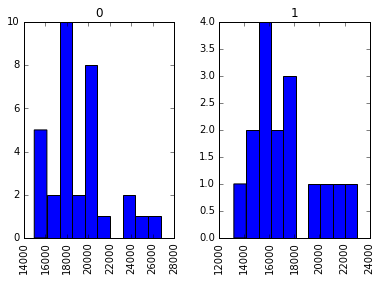

In [10]:
data['1990'].hist(by=data.SOUTH)

### Using `pyplot`

Pyplot, a submodule of matplotlib, is the main driver for most plotting code in Python. It has a few basic commands that we will use to make statistical plots. 

Most importantly, though, the [matplotlib gallery](http://matplotlib.org/gallery.html) provides a good reference for different commonly-encountered plotting problems. 

First, though, we will cover basic line and point plotting.

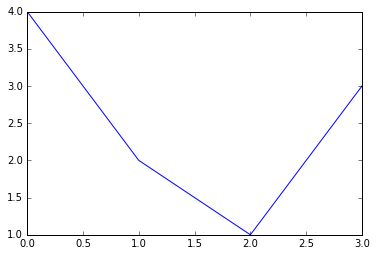

In [11]:
plt.plot([4,2,1,3])

First, note that when `plot` is passed a single list or array, $(i, y_i)$ is plotted, where $i$ is the position of an element in the list.

When we pass two lists, matplotlib interprets the first list as the x-coordinates and the second as a list of the y-coordinates. 

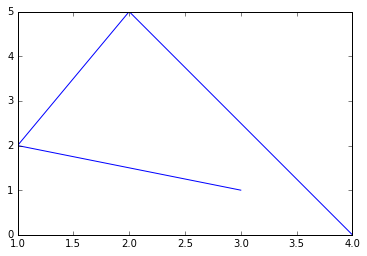

In [12]:
plt.plot([4,2,1,3], [0,5,2,1])

There are a few ways to plot many different lines at once. The easiest way to do this is to run multiple plot commands before calling `plt.show()`. This adds each line generated from `plt.plot` to the same figure, which is then shown when `plt.show()` is called.

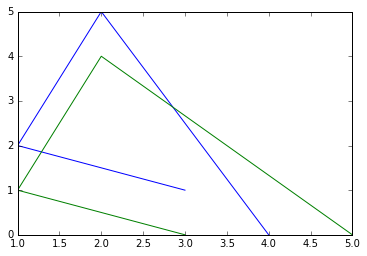

In [14]:
plt.plot([4,2,1,3], [0,5,2,1])
plt.plot([5,2,1,3], [0,4,1,0])
plt.show()

Noting this, you can use many of the various types of customization functions in matplotlib before `plt.show()` and they will be applied to the current figure:

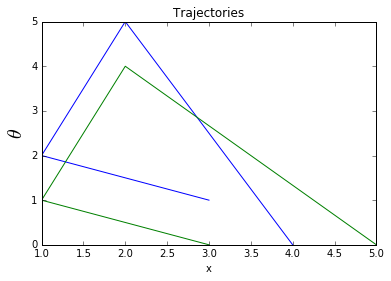

In [15]:
plt.plot([4,2,1,3], [0,5,2,1])
plt.plot([5,2,1,3], [0,4,1,0])
plt.title('Trajectories')
plt.ylabel('$\\theta$', fontsize=20)
plt.xlabel('x')
plt.show()

One very powerful aspect of matplotlib is that it plots each row of an array as a new line as well. To show how this is powerful, let's make a plot of the per capita income of all states over time. 

Since we have income data from 1929 to 2009, and typing all of those columns would be tedious, let's do it using Python:

In [16]:
columns = [str(year) for year in range(1929, 2010) ]

In [17]:
columns

['1929',
 '1930',
 '1931',
 '1932',
 '1933',
 '1934',
 '1935',
 '1936',
 '1937',
 '1938',
 '1939',
 '1940',
 '1941',
 '1942',
 '1943',
 '1944',
 '1945',
 '1946',
 '1947',
 '1948',
 '1949',
 '1950',
 '1951',
 '1952',
 '1953',
 '1954',
 '1955',
 '1956',
 '1957',
 '1958',
 '1959',
 '1960',
 '1961',
 '1962',
 '1963',
 '1964',
 '1965',
 '1966',
 '1967',
 '1968',
 '1969',
 '1970',
 '1971',
 '1972',
 '1973',
 '1974',
 '1975',
 '1976',
 '1977',
 '1978',
 '1979',
 '1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009']

Now, we can use these to grab each year's data from our dataframe:

In [18]:
data[columns]

,1929,1930,1931,1932,1933,1934,1935,1936,1937,1938,...,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009
0,323,267,224,162,166,211,217,251,267,244,...,23471,24467,25161,26065,27665,29097,30634,31988,32819,32274
1,600,520,429,321,308,362,416,462,504,478,...,25578,26232,26469,27106,28753,30671,32552,33470,33445,32077
2,310,228,215,157,157,187,207,247,256,231,...,22257,23532,23929,25074,26465,27512,29041,31070,31800,31493
3,991,887,749,580,546,603,660,771,795,771,...,32275,32750,32900,33801,35663,37463,40169,41943,42377,40902
4,634,578,471,354,353,368,444,542,532,506,...,32949,34228,33963,34092,35543,37388,39662,41165,41719,40093
5,1024,921,801,620,583,653,706,806,860,769,...,40640,42279,42021,42398,45009,47022,51133,53930,54528,52736
6,1032,857,775,590,564,645,701,868,949,795,...,31255,32664,33463,34123,35998,37297,39358,40251,40698,40135
7,518,470,398,319,288,348,376,450,487,460,...,28145,28852,29499,30277,32462,34460,36934,37781,37808,36565
8,347,307,256,200,204,244,268,302,313,290,...,27940,28596,28660,29060,29995,31498,32739,33895,34127,33086
9,507,503,374,274,227,403,399,475,423,426,...,24180,25124,25485,25912,27846,29003,30954,32168,32322,30987


Now, `plot` will *iterate* over an array or a list of lists passed to it, and interpret each row of the array as its own line. So, if we wanted to plot the changes in per-capita income over time, we would need to plot each *column* above, not each row. 

Fortunately, we can simply transpose the values matrix and get what we need:

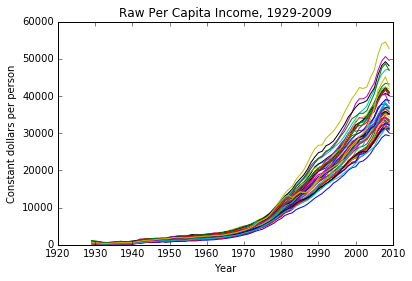

In [19]:
plt.plot(columns, data[columns].values.T)
plt.title('Raw Per Capita Income, 1929-2009')
plt.xlabel('Year')
plt.ylabel('Constant dollars per person')
plt.show()

If we wanted to normalize the data, we could do this in an array-wise fashion. 

In [20]:
centered_pci = data[columns].values - data[columns].values.mean(axis=0)
normalized_pci = centered_pci / centered_pci.var(axis=0)**.5

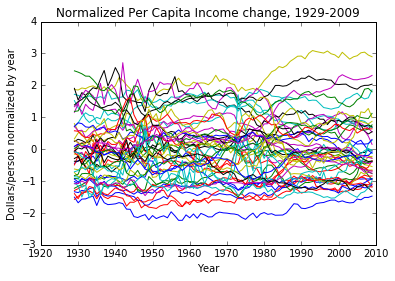

In [21]:
plt.plot(columns, normalized_pci.T)
plt.title('Normalized Per Capita Income change, 1929-2009')
plt.xlabel('Year')
plt.ylabel('Dollars/person normalized by year')
plt.show()

Again, since matplotlib interprets the first list as x-coordinates and the second as y-coordinates, we can make scatterplots very quickly. 

For instance, we can make a Moran scatterplot, a common spatial dependence diagnostic plot, from this data. First, we need to grab the last year's income data:

In [22]:
last = data['2009'].values

Then, we can use the `pysal.lag_spatial` function, along with our row-standardized weights, to construct the spatial lag of the 2009 per capita income:

In [23]:
W.transform = 'r'

In [24]:
Wlast = ps.lag_spatial(W, last)

Since this is a scatterplot, we don't want to use the default drawing behavior, which connects all points plotted with a line. 

Matplotlib has two interfaces to change line parameters. The first uses a string to specify different plotting parameters, like color and marker. The string can contain a color and a marker style in any order. 

For example, the following string, `'.k'` plots each point using small black dots:

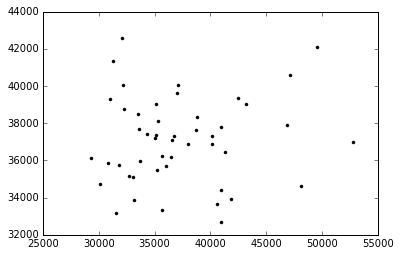

In [25]:
plt.plot(last, Wlast, '.k')

For larger dots, you can use the `o` marker:

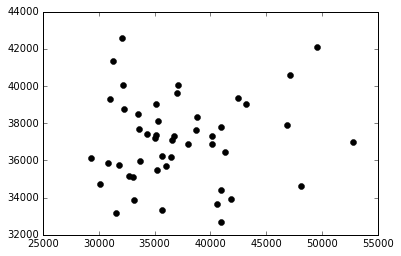

In [26]:
plt.plot(last, Wlast, 'ok')

To add vertical, horizontal, or sloped lines lines to the plot, you use various different line plotting functions. 

For a simple scatter plot with line of best fit, you'll need to estimate a regression on the data and use the slope and intercept from that. We can do this very quickly using PySAL:

In [27]:
reg = ps.spreg.OLS(Wlast.reshape(-1,1), last.reshape(-1,1))
#a,b = np.polyfit(last, Wlast, 1) #will also work

In [28]:
a,b = reg.betas

Finally, to put it all together, we will draw on the X and Y axes as vertical and horizontal lines through the X and Y means, and will draw the line of best fit. In addition, we can annotate the plot with text, and will add the Moran's $I$, the slope of the line of best fit, to the plot:

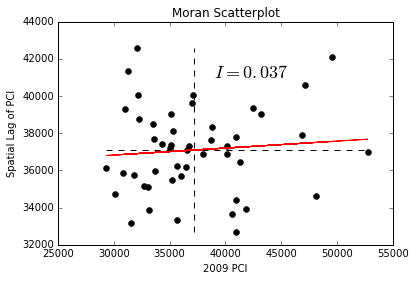

In [29]:
plt.plot(last, Wlast, 'ok')
 # dashed vert at mean of the last year's PCI
plt.vlines(last.mean(), Wlast.min(), Wlast.max(), linestyle='--')
 # dashed horizontal at mean of lagged PCI
plt.hlines(Wlast.mean(), last.min(), last.max(), linestyle='--')
# red line of best fit
plt.plot(last, a + b*last, 'r')
plt.text(s='$I = %.3f$' %b, x=39000, y=41000, fontsize=18)
plt.title('Moran Scatterplot')
plt.ylabel('Spatial Lag of PCI')
plt.xlabel('2009 PCI')

### Seaborn

In addition to the most-commonly used plotting library in Python, `matplotlib`, it is good to know about the [`seaborn`](https://stanford.edu/~mwaskom/software/seaborn/) library, dedicated to making simple statistical plots.

Like matplotlib, seaborn has a deep [gallery](https://stanford.edu/~mwaskom/software/seaborn/examples/index.html) with many different types of visualizations. Seaborn's focus is on quick but pretty statistical visualizations, so it comes with many more specialized plot types than the distribution plots shown above.

In a few ways, it'll help us make better plots, and can especially help when reusing plots in various contexts.

There are too many different dedicated statistical plot types in seaborn to cover now, but we'll show how seaborn affects standard plotting in matplotlib, as well as show some of the more useful pre-baked plot types in seaborn.

In [30]:
import seaborn as sns

First, let's re-plot the moran scatterplot from above:

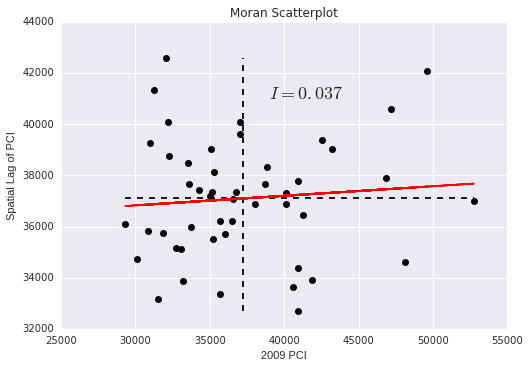

In [31]:
plt.plot(last, Wlast, 'ok')
 # dashed vert at mean of the last year's PCI
plt.vlines(last.mean(), Wlast.min(), Wlast.max(), linestyle='--')
 # dashed horizontal at mean of lagged PCI
plt.hlines(Wlast.mean(), last.min(), last.max(), linestyle='--')
# red line of best fit
plt.plot(last, a + b*last, 'r')
plt.text(s='$I = %.3f$' %b, x=39000, y=41000, fontsize=18)
plt.title('Moran Scatterplot')
plt.ylabel('Spatial Lag of PCI')
plt.xlabel('2009 PCI')

Note that it looks quite different. `seaborn`, when imported, changes a few of the basic graphical parameters of matplotlib. 

Once imported, the `set_context` function can be used to scale the content of a graph up or down, depending on the context in which it might be used. 

For instance, let's look at the difference between the `article` context:

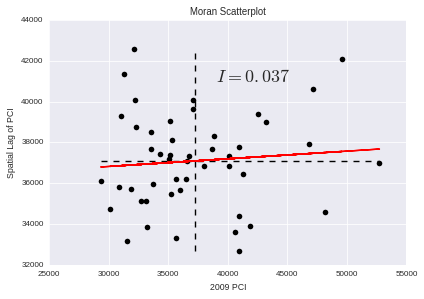

In [32]:
sns.set_context('paper')

plt.plot(last, Wlast, 'ok')
 # dashed vert at mean of the last year's PCI
plt.vlines(last.mean(), Wlast.min(), Wlast.max(), linestyle='--')
 # dashed horizontal at mean of lagged PCI
plt.hlines(Wlast.mean(), last.min(), last.max(), linestyle='--')
# red line of best fit
plt.plot(last, a + b*last, 'r')
plt.text(s='$I = %.3f$' %b, x=39000, y=41000, fontsize=18)
plt.title('Moran Scatterplot')
plt.ylabel('Spatial Lag of PCI')
plt.xlabel('2009 PCI')

and the `talk` context:

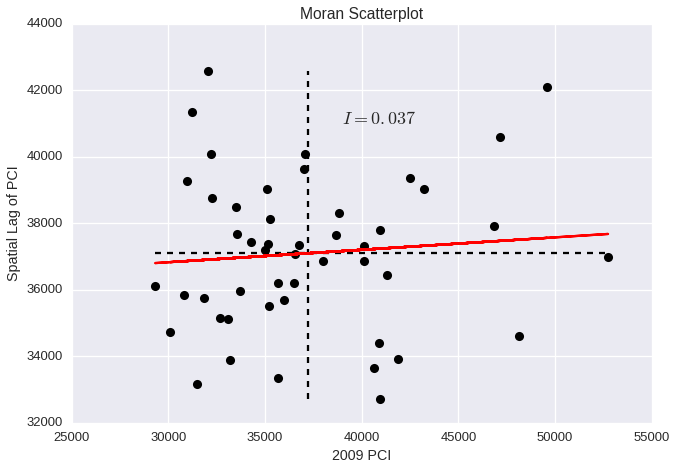

In [33]:
sns.set_context('talk')

plt.plot(last, Wlast, 'ok')
 # dashed vert at mean of the last year's PCI
plt.vlines(last.mean(), Wlast.min(), Wlast.max(), linestyle='--')
 # dashed horizontal at mean of lagged PCI
plt.hlines(Wlast.mean(), last.min(), last.max(), linestyle='--')
# red line of best fit
plt.plot(last, a + b*last, 'r')
plt.text(s='$I = %.3f$' %b, x=39000, y=41000, fontsize=18)
plt.title('Moran Scatterplot')
plt.ylabel('Spatial Lag of PCI')
plt.xlabel('2009 PCI')

text and shaping gets rescaled quite significantly. 

But, seaborn can generate a ton of other plots as well. The most useful of these tends to be `kdeplot` and `distplot`. 

### kernel density plots

by default, kernel density plots are a common and powerful plotting technique. Seaborn makes it easy to do KDE plots in one and two dimensions:

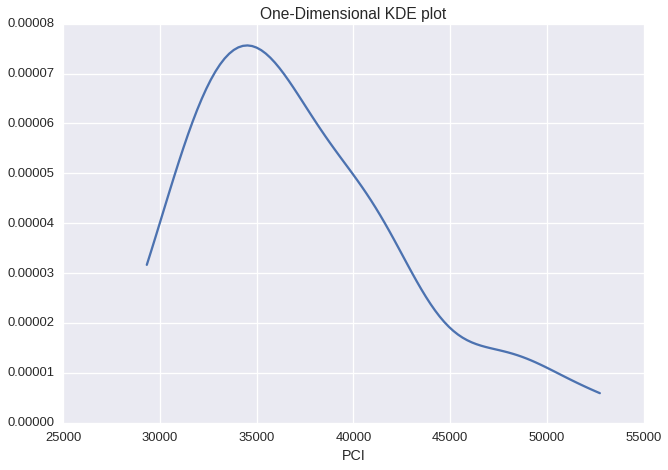

In [34]:
sns.kdeplot(last)
plt.title('One-Dimensional KDE plot')
plt.xlabel('PCI')

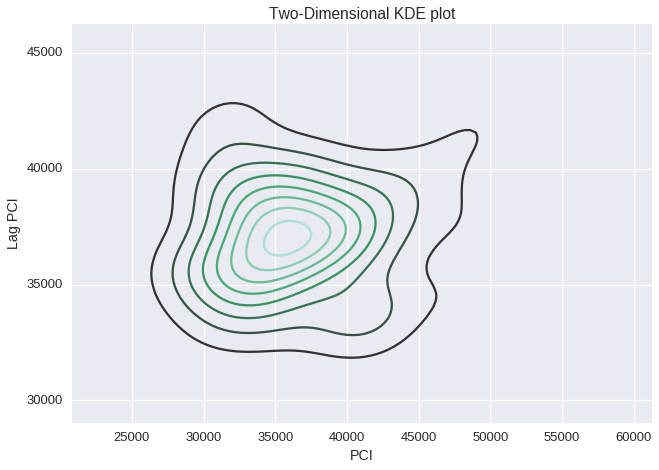

In [35]:
sns.kdeplot(last, Wlast)
plt.title('Two-Dimensional KDE plot')
plt.ylabel('Lag PCI')
plt.xlabel('PCI')
plt.savefig?

Instead of doing a two-dimensional plot, if you would like to plot two distributions in one frame, use two separate calls to `sns.kdeplot`, followed by a `plt.show()` call. 

In addition, when using more than one line, you can label each line being plotted and use a legend by providing a `label` argument to each line plotting function, and then calling `plt.legend()`. 

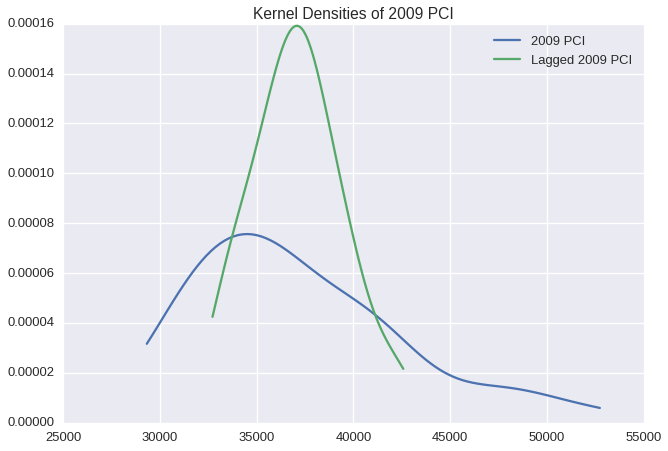

In [36]:
plt.title('Kernel Densities of 2009 PCI')
sns.kdeplot(last, label='2009 PCI')
sns.kdeplot(Wlast, label='Lagged 2009 PCI')
plt.legend()
plt.show()

Like always, there are many more options, so consult the documentation for more information about the flexibility of the `kdeplot` function.

In [37]:
sns.kdeplot?

### Distplot

In many cases, we would like to visualize how well our data fits to a specific distributional form. We can do this with seaborn via `distplot`. 

By default, `distplot` will fit a histogram under a kernel density plot:

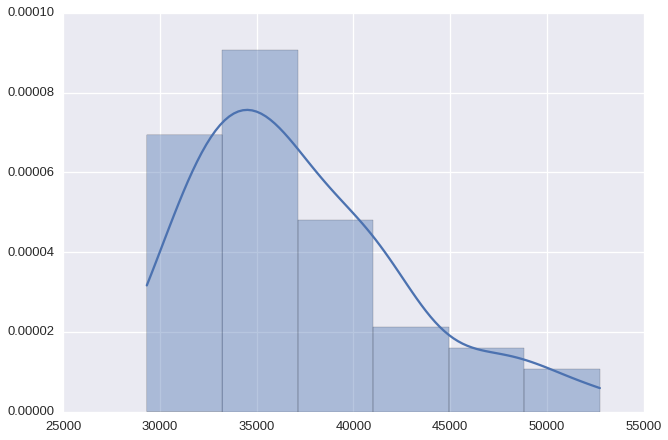

In [38]:
sns.distplot(last)

But, when supplied a distribution from `scipy`, the standard scientific python library, it will fit the histogram to the given distribution by estimating the proper parameters:

In [39]:
import scipy.stats as stats

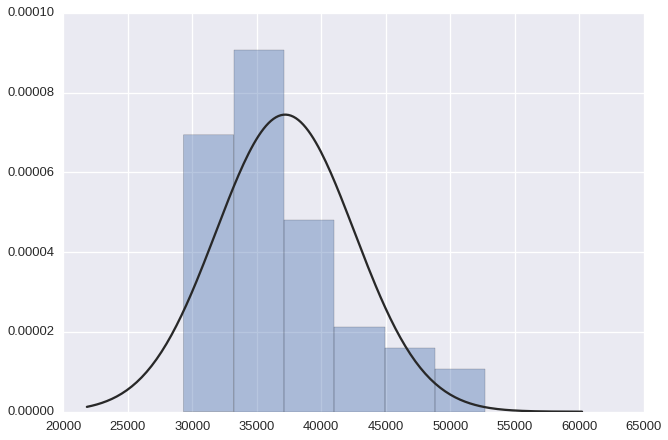

In [40]:
sns.distplot(last, fit=stats.norm, kde=False)

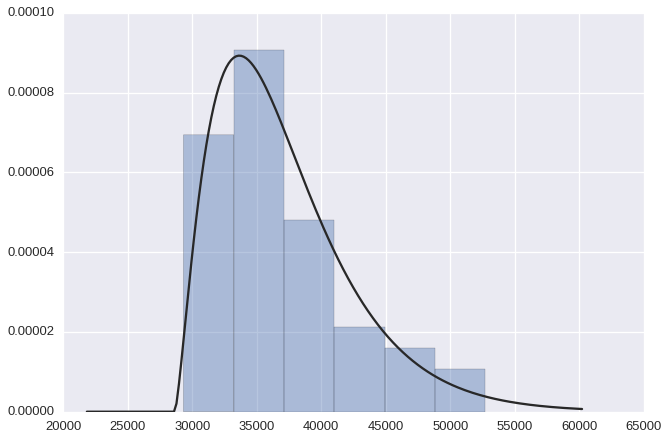

In [41]:
sns.distplot(last, fit=stats.gamma, kde=False)

### Heatmap

Heatmaps are useful to visualize the structure of sparse matrices. 

Here, we can visualize our spatial weights matrix for the 48 contiguous US States:

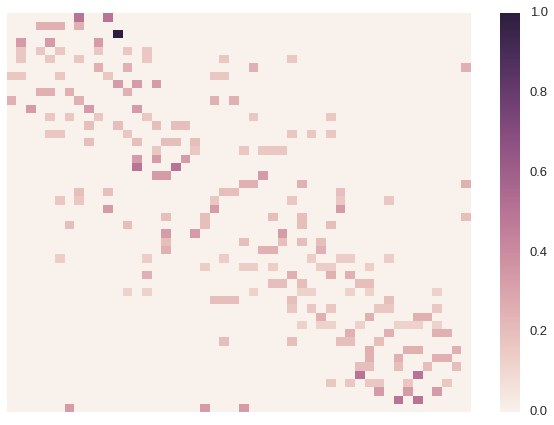

In [42]:
sns.heatmap(W.full()[0])
plt.xticks([])
plt.yticks([])
plt.show()

### LMPlot

In [43]:
columbus = ps.pdio.read_files(ps.examples.get_path('columbus.shp'))
Wco = ps.queen_from_shapefile(ps.examples.get_path('columbus.shp'))
columbus['downtown'] = columbus.DISCBD < columbus.DISCBD.describe()['25%']

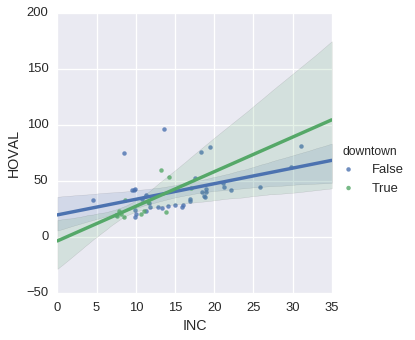

In [44]:
sns.lmplot('INC', 'HOVAL',columbus, hue='downtown')

### Pairgrid

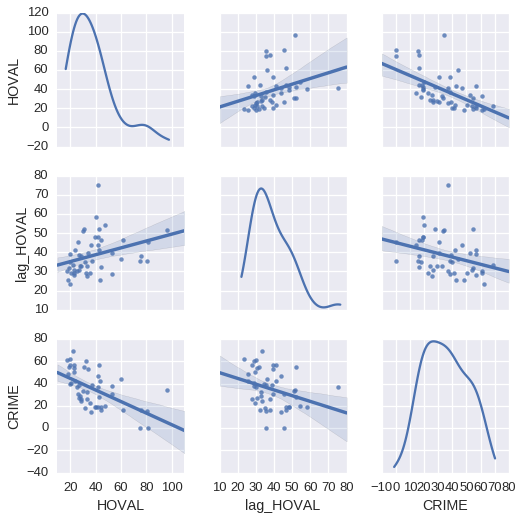

In [45]:
Wco.transform = 'r'
columbus['lag_HOVAL'] = ps.lag_spatial(Wco,columbus['HOVAL'].values)
sns.pairplot(columbus, kind='reg', vars=['HOVAL', 'lag_HOVAL', 'CRIME'], diag_kind='kde')